In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
F = len("Maria") # Number of letters in first name
L = len ("Mazur") # Number of letters in last name 


Excercise 1 - Generated Quantities Block

In [4]:
gen_quant = CmdStanModel(stan_file='home/code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


##### Compile code_1.stan and sample from it using M=F

In [5]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


##### Create a pandas dataframe from resulting draws

In [6]:

df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,20.8297,19.0,22.0,21.0,22.0,19.0
1,0.0,0.0,56.5534,65.0,42.0,50.0,54.0,70.0
2,0.0,0.0,140.3180,140.0,147.0,146.0,157.0,150.0
3,0.0,0.0,143.7280,145.0,145.0,145.0,154.0,144.0
4,0.0,0.0,126.4450,113.0,133.0,119.0,137.0,135.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,26.0188,19.0,35.0,27.0,25.0,33.0
996,0.0,0.0,169.8560,168.0,166.0,159.0,188.0,175.0
997,0.0,0.0,47.0853,36.0,38.0,56.0,35.0,39.0
998,0.0,0.0,58.7016,47.0,55.0,57.0,59.0,55.0


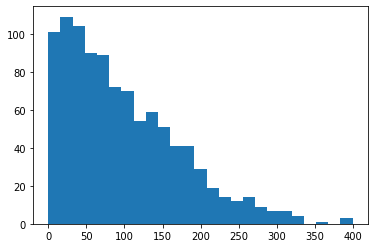

In [7]:
plt.hist(df["lambda"], bins =25)
plt.show()

<Figure size 720x432 with 0 Axes>

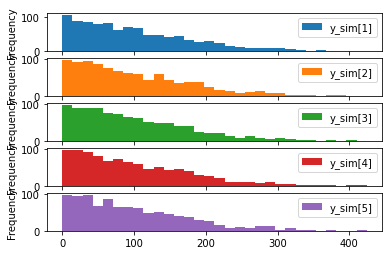

In [8]:
df2 = df.drop(df.columns[0:3],axis=1)
plt.figure(figsize=(10, 6))
df2.plot.hist(subplots=True, bins=30)
plt.show()


Excercise 2 - Constraints on the data

In [9]:
bern1 = CmdStanModel(stan_file='home/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
# Setting 'y':[0,2] throws an error "Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1]"
# Due to this error I set the y to [0,1]

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [10]:
bern2 = CmdStanModel(stan_file='home/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
# Here appeared the same error as abve so I changes value of y also to [0,1]

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


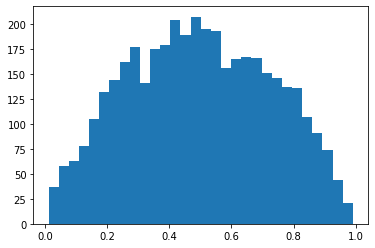

In [11]:
x1 = samp_bern1.stan_variable('theta')
x2 = samp_bern2.stan_variable('theta')
plt.hist(x1, bins= 30)
plt.show()

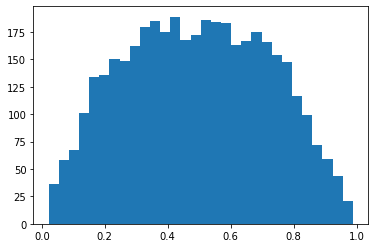

In [12]:
plt.hist(x2, bins =30)
plt.show()

Excercise 3 - Constraints on parameters
Unconstrained parameters

In [13]:
model_gm1 = CmdStanModel(stan_file='home/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
print(out_gamma1.diagnose())


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▌  | 00:00 Iteration: 5100 / 7000 [ 72%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /samples/code_4-20230321154440_1.csv, /samples/code_4-20230321154440_2.csv, /samples/code_4-20230321154440_3.csv, /samples/code_4-20230321154440_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
9489 of 24000 (39.54%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



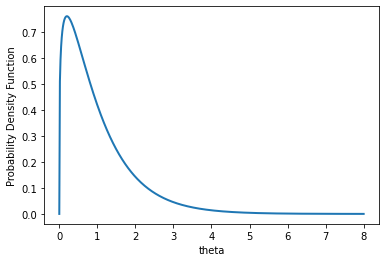

In [14]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Constrained parameter

In [15]:
model_gm2 = CmdStanModel(stan_file='home/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
print(out_gamma2.diagnose())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▍   | 00:00 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /samples/code_5-20230321154440_1.csv, /samples/code_5-20230321154440_2.csv, /samples/code_5-20230321154440_3.csv, /samples/code_5-20230321154440_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2 of 24000 (0.01%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



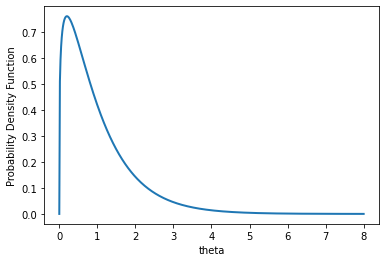

In [16]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Excercise 4 - Selection of parameters using equation solving

In [17]:
model_tune = CmdStanModel(stan_file='home/code_6.stan')

#F = # number of letters in the first name
#L = # number of letters in the last name
y0 = 1# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Excercise 5 - different methods of defining models

In [18]:
model_samp_st = CmdStanModel(stan_file='home/code_7.stan')
model_log_target = CmdStanModel(stan_file='home/code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='home/code_9.stan')
data = {'N': F}
seed = 231120000#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


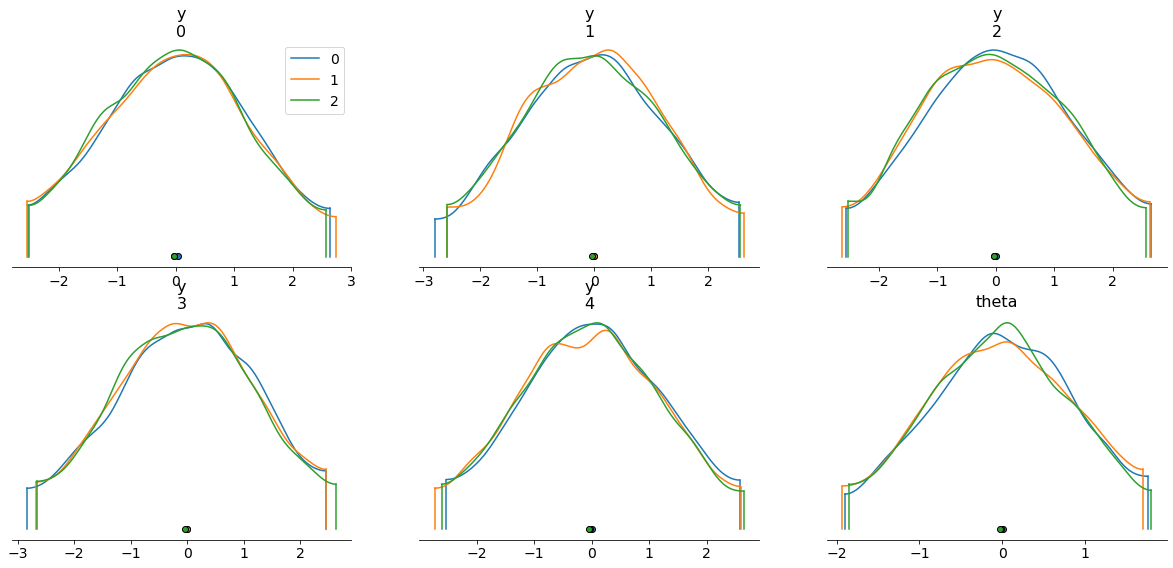

In [19]:
az.plot_density([result_1,result_2,result_3])
plt.show()

Excercise 6 - generated quantities post sampling

In [20]:
model_gq = CmdStanModel(stan_file='home/code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing


In [21]:
# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()

<AxesSubplot:ylabel='Frequency'>

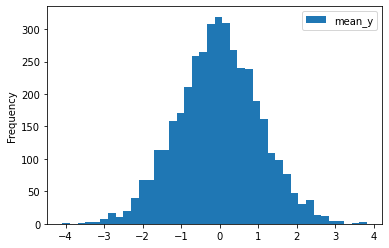

In [22]:
df.plot.hist(bins=40)